In [29]:
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [30]:
def plot_result(STATE, leg='', lim =100000):
    arquivo = open(STATE+'_scores.txt', 'r')
    txt = arquivo.read()
    arquivo.close()
    l = list(literal_eval(txt))

    if len(l)>lim:
        n = np.array(l[:lim]) 
    else:    
        n = np.array(l)

    mean =[n[:a].mean() for a in range(1,len(n)+1)]

    median =[np.median(n[:a]) for a in range(1,len(n)+1)]

    mean200 =[a>200 and n[a-200:a].mean() or n[:a].mean()  for a in range(1,len(n)+1)]

    median200 =[a>200 and np.median(n[a-200:a]) or np.median(n[:a])  for a in range(1,len(n)+1)]

    print(STATE)
    print('mean:   ',round(mean[-1],1), '  ||  mean200:   ',round(mean200[-1],1))
    print('median: ',round(median[-1],2), '  ||  median200: ',round(median200[-1],2))
    print('max:     ',np.max(n), '  || times:        ',np.count_nonzero(n==np.max(n)))
    print('zeros: ',np.count_nonzero(n==0),'(',round(np.count_nonzero(n==0)/len(n)*100,2),'%)')
    print('total: ',len(n))
    
    plt.style.use("default")

    plt.title(STATE)
    plt.xlabel('Number of Games')
    plt.ylabel('Score')
    plt.scatter(range(len(n)),n,alpha=0.05)
    plt.plot(mean200, c='orange')
    plt.plot(median200, c='green')
    plt.plot(mean, c='red')
    plt.plot(median, c='purple')
    plt.ylim(ymin=0)

    plt.text(np.argmax(n), np.max(n), 'max='+str(np.max(n)))
    plt.text(len(n), 0, '0s: '+str(round(np.count_nonzero(n==0)/len(n)*100,2))+'%')
    plt.legend(['score','mean200','median200','mean','median'],fontsize=6)

    plt.savefig(STATE+ leg +'.png')
    plt.show()
    return len(n)

STATE1
mean:    19.8   ||  mean200:    7.9
median:  16.0   ||  median200:  6.5
max:      104   || times:         1
zeros:  186 ( 3.96 %)
total:  4700


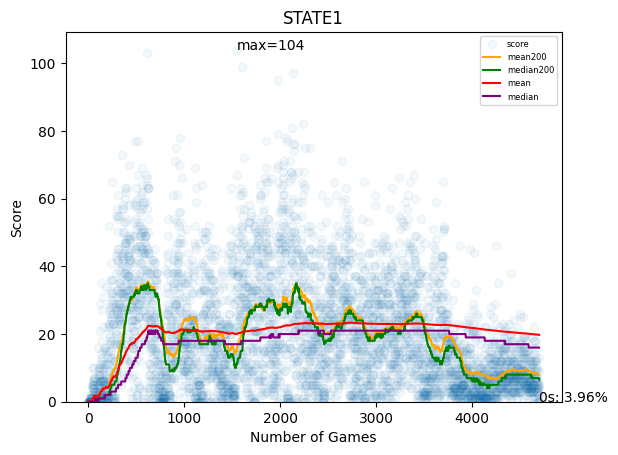

4700

In [31]:
plot_result('STATE1', lim=4700)

STATE2
mean:    6.9   ||  mean200:    6.1
median:  6.0   ||  median200:  5.5
max:      46   || times:         1
zeros:  1421 ( 5.0 %)
total:  28400


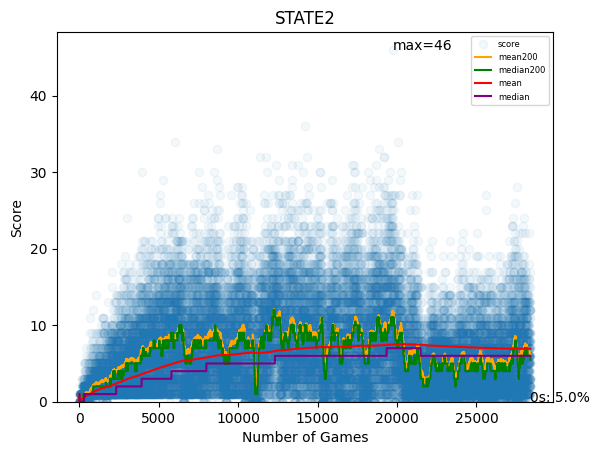

28400

In [32]:
plot_result('STATE2')

STATE3
mean:    12.6   ||  mean200:    36.9
median:  3.0   ||  median200:  41.0
max:      110   || times:         1
zeros:  4920 ( 35.65 %)
total:  13800


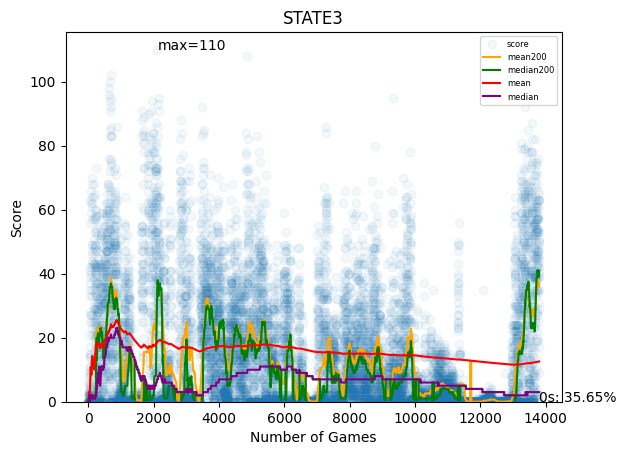

13800

In [33]:
plot_result('STATE3')

STATE3_4700
mean:    17.5   ||  mean200:    9.1
median:  11.0   ||  median200:  8.5
max:      110   || times:         1
zeros:  1522 ( 26.47 %)
total:  5750


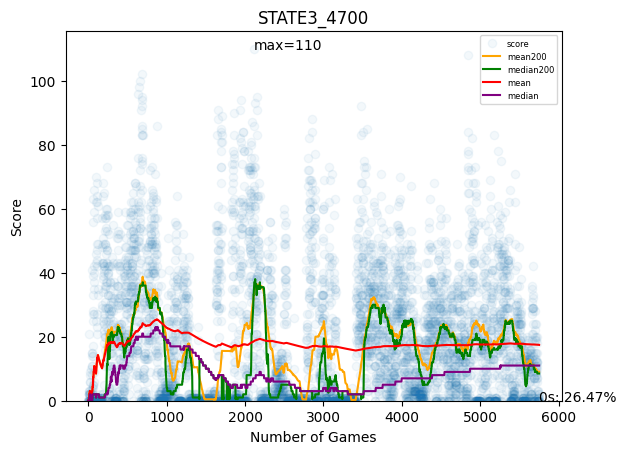

5750

In [34]:
plot_result('STATE3_4700')